In [9]:
import numpy as np
import pandas as pd
from mnist_kera_utils import *
from matplotlib.pyplot import imshow

%matplotlib inline

In [2]:
train, test = pd.read_csv('C://erdongguo/digit_recognizer/train.csv'), pd.read_csv('C://erdongguo/digit_recognizer/test.csv')

In [3]:
train_image = train.iloc[:, 1:]
train_label = train.iloc[:, 0]
train_image = np.array(train_image)
train_image.shape
train_image = train_image.reshape(train_image.shape[0], 28, 28, 1)
train_label = np.array([train_label]).T
test_image = np.array(test)
test_image = test_image.reshape(test_image.shape[0], 28, 28, 1)

In [4]:
train_label = to_categorical(train_label, num_classes = 10)

In [5]:
index = 7
sample = train_image[index]
sample = np.reshape(sample, (28, 28))
sample_test = test_image[index]
sample_test = np.reshape(sample_test, (28, 28))

The number is [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.].


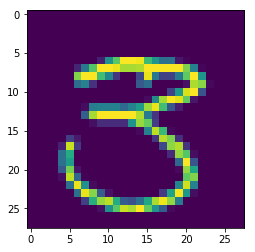

In [10]:
plt.imshow(sample)
print('The number is ' + str(train_label[index]) + '.')

The number is ?


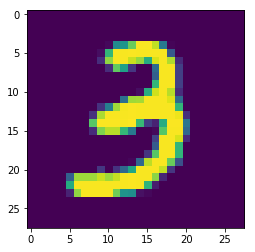

In [11]:
plt.imshow(sample_test)
print('The number is ' + '?')

In [12]:
train_image = train_image / 255
test_image = test_image / 255

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(train_image, train_label, 
                                                   train_size = 0.8, test_size = 0.2, random_state = 0)

In [15]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 33600
number of test examples = 8400
X_train shape: (33600, 28, 28, 1)
Y_train shape: (33600, 10)
X_test shape: (8400, 28, 28, 1)
Y_test shape: (8400, 10)


In [16]:
digit_rec_model = digit_rec_model((28, 28, 1))

In [17]:
digit_rec_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
digit_rec_model.fit(x = X_train, y = Y_train, epochs = 2, batch_size = 64)

Epoch 1/2
33600/33600 [==============================] - 23s 687us/step - loss: 0.2416 - acc: 0.9257
Epoch 2/2
33600/33600 [==============================] - 23s 692us/step - loss: 0.2049 - acc: 0.93691s - loss: 0.


In [21]:
preds = digit_rec_model.evaluate(x = X_test, y = Y_test)
print()
print('Loss = ' + str(preds[0]))
print('Test Accuracy = ' + str(preds[1]))

8400/8400 [==============================] - 2s 287us/step

Loss = 0.204113638578
Test Accuracy = 0.935


In [22]:
Y_proba = digit_rec_model.predict(test_image)

In [23]:
Y_predict_classes = Y_proba.argmax(axis = -1)

In [24]:
ImageId = np.arange(1, 28001).T

In [25]:
submission = pd.DataFrame({'ImageId': ImageId, 'Label': Y_predict_classes})

In [26]:
submission.to_csv('C://erdongguo/digit_recognizer/submission_v1.csv', index = False)